# HW #2 -21800487

*필요한 최소한의 모듈은 모두 import 했습니다. 추가로 필요한 모듈이 있다면 임의로 추가하셔도 됩니다.*

만약 모듈이 설치되어 있지 않다면
!pip install
을 사용하여 설치해 주세요

이번 과제에서는 첫째로 HW #1 에서 사용한 데이터를 가지고, 분류하고 학습을 통해 class를 예측하는 것이 목표입니다.

In [18]:
## Data Import

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import mean_squared_error



%matplotlib inline

iris = load_iris()

In [19]:
#1 학습을 진행하기 위해선 train_set 와 test_set으로 나누어야 합니다.
# test_size 는 0.2, random_state 는 1로 진행해주세요
X = iris.data
y = iris.target

# your code here

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=1)

print("train size: %d\ntest size: %d"%(X_train.shape[0], X_test.shape[0]))


train size: 120
test size: 30


In [20]:
#2 사이킷런에서는 다양한 모델을 제공합니다.
# 여기에선 RandomForestClassifier 를 사용하겠습니다.
# your code here

rnd = RandomForestClassifier()
rnd.fit(X_train,y_train)
score=rnd.score(X_train,y_train)

print('The accuracy : {:.3f}'.format(score))

The accuracy : 1.000


In [21]:
#3 train에서 만족스러운 score가 나왔습니다.
# test_set에서 한번 확인해 보세요
#your code here


score=rnd.score(X_test,y_test)

print('The accuracy : {:.3f}'.format(score))


The accuracy : 0.967


두번째로는 로지스틱 회기중 L1과 L2의 차이를 알아보는 것이 목표입니다.

In [22]:
## Data Import

from sklearn.datasets import fetch_openml

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

MNIST = fetch_openml('mnist_784', version=1)

In [37]:
#4 학습을 진행하기 위해선 train_set 와 test_set으로 나누어야 합니다.
# train_size = 3000, test_size = 2000, random_state = 1 로 진행해주세요.
# your code here

X, y= MNIST.data, MNIST.target

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=3000,
                                                   test_size=2000,
                                                   random_state=1)
print(X_train.shape, X_test.shape)

(3000, 784) (2000, 784)


In [38]:
#5 입력의 스케일을 조정하면 모델의 성능을 향상시킬 수 있습니다.
# StandarScaler를 이용해주세요.
# your code here

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
print("mean: {}, std: {}\n\n".format(X_train_scaled.mean(), X_train_scaled.std()))

mean: -2.1449206734254724e-19, std: 0.9091372900969907




(3000, 784) (2000, 784)
Test score with L1 penalty: 0.8710


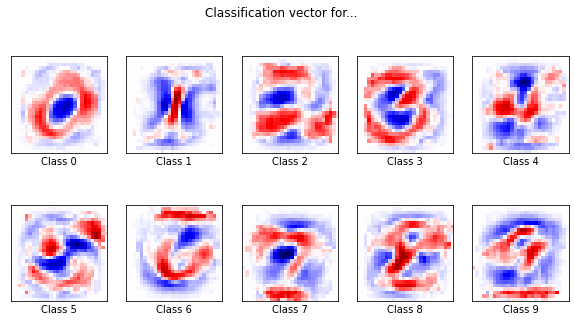

In [39]:
#6 L1에 대해 먼저 확인해 보겠습니다.
# plot은 coeffecient를 각 class 별로 분류하여 plot한 것입니다.
#your code here

log_l1 = LogisticRegression(random_state=0, penalty='l1', C=1, tol=0.1,solver='saga', multi_class='multinomial')

print(X_train_scaled.shape, X_test_scaled.shape)

log_l1.fit(X_train_scaled,y_train)
score=log_l1.score(X_test_scaled,y_test)
print("Test score with L1 penalty: %.4f" % score)

coef = log_l1.coef_
plt.figure(figsize=(10,5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2,5, i + 1)
    l1_plot.imshow(coef[i].reshape(28,28),interpolation='nearest',cmap=plt.cm.seismic,vmin=-scale,vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' %i)
plt.suptitle('Classification vector for...')

plt.show()

Test score with L2 penalty: 0.8760


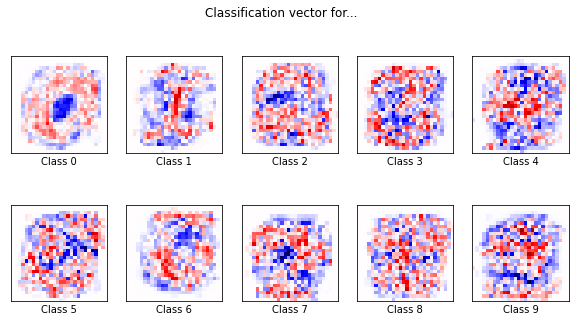

In [40]:
#7 L2에 대해 확인해 보겠습니다.
#your code here

log_l2 = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=300, tol=0.1)
log_l2.fit(X_train_scaled,y_train)
score=log_l2.score(X_test_scaled,y_test)

print("Test score with L2 penalty: %.4f" % score)

coef = log_l2.coef_
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28,28),interpolation='nearest',cmap=plt.cm.seismic,vmin=-scale,vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')


plt.show()

#8 L1과 L2의 차이에 대해 간력하게 설명해 주세요.


l1, l2 모두 과적합을 막기위한 정규화방법으로 사용되며,
l1(라쏘회귀)은 변수선택이 가능하고, 명시해가 없으며, 비중요 변수를 우선적으로 줄인다. Unstable solution, 변수간 상관관계가 높으면 성능이 저하된다.
비용함수에 가중치 파라미터의 절댓값을 모두 더한 형태

l2(릿지회귀)는 변수선택이 불가능하고 closed form의 solution이 존재하며, 크기가 큰 변수를 우선적으로 줄인다. 변수간 상관관계가 높아도 좋은 성능을 보인다. 
stable solution. 비용함수에 가중치 파라미터의 제곱을 모두 더한 형태




두번째로 책에 나온 캘리포니아 주택 가격 데이터 셋을 이용하여 SVM 회귀를 훈련시키는 것이 목표입니다.

In [10]:
## Data import

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
X = housing.data
y = housing.target

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [11]:
#9 학습을 진행하기 위해선 train_set 와 test_set으로 나누어야 합니다.
# test_size 는 0.2, random_state 는 1로 진행해주세요
# your code here

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=1)
print("train size: %d\ntest size: %d"%(X_train.shape[0], X_test.shape[0]))


train size: 16512
test size: 4128


In [12]:
#10 입력의 스케일을 조정하면 모델의 성능을 향상시킬 수 있습니다.
# StandarScaler를 이용해주세요
# your code here

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

print("mean: {}, std: {}\n\n".format(X_train_scaled.mean(), X_train_scaled.std()))

mean: -3.351485755587191e-14, std: 0.9999999999999996




In [14]:
#11 모델의 하이퍼파라미터 튜닝을 위해 GridSearchCV를 활용하세요.
# 컴퓨터 사양에 따라 시간이 오래 걸릴 수 있습니다.
# cv 의 값과 verbose 의 값을 크게해도 상관없지만 3 이상은 추천하지 않습니다.
# GridSearchCV의 결과로 나온 best 파라미터를 출력하세요.

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param = {'kernel': ['linear','poly','rbf','sigmoid'],'gamma':[0.07, 0.08]}

# your code here
svr=SVR()
svr_grid = GridSearchCV(svr,param_grid=param,cv=2,scoring='neg_mean_squared_error',verbose=2)
svr_grid.fit(X_train_scaled, y_train)
y_pred = svr_grid.predict(X_test_scaled)
best_params = svr_grid.best_params_
print('Best params are : ', best_params)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] gamma=0.07, kernel=linear .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................ gamma=0.07, kernel=linear, total=  10.6s
[CV] gamma=0.07, kernel=linear .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV] ........................ gamma=0.07, kernel=linear, total=  12.0s
[CV] gamma=0.07, kernel=poly .........................................
[CV] .......................... gamma=0.07, kernel=poly, total=  23.2s
[CV] gamma=0.07, kernel=poly .........................................
[CV] .......................... gamma=0.07, kernel=poly, total=  27.6s
[CV] gamma=0.07, kernel=rbf ..........................................
[CV] ........................... gamma=0.07, kernel=rbf, total=   7.3s
[CV] gamma=0.07, kernel=rbf ..........................................
[CV] ........................... gamma=0.07, kernel=rbf, total=   7.5s
[CV] gamma=0.07, kernel=sigmoid ......................................
[CV] ....................... gamma=0.07, kernel=sigmoid, total=  11.7s
[CV] gamma=0.07, kernel=sigmoid ......................................
[CV] ....................... gamma=0.07, kernel=sigmoid, total=  11.2s
[CV] gamma=0.08, kernel=linear .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  4.1min finished


Best params are :  {'gamma': 0.08, 'kernel': 'rbf'}


In [15]:
#12 훈련시킨 모델의 mse 값을 출력하세요
# 점수가 출력창과 다를 수 있습니다.
# your code here

mse=mean_squared_error(y_test,y_pred)
print('mse :', mse)

mse : 0.3682475770571584
